In [1]:
import os
import numpy as np
import scipy as sp
import librosa as lib
import matplotlib.pyplot as plt
import sounddevice as sd
import pywt
import soundfile

915
[ 85 163 837 915]


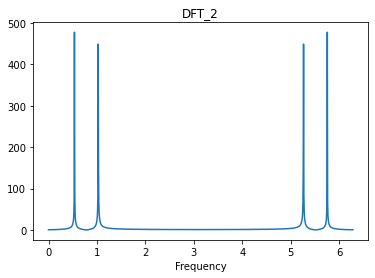

In [2]:
#PART_1

t=np.linspace(0,1000/8192,1000)
def tone_func(a,b,n):
    temp=np.sin(a*n)+np.sin(b*n)
    return temp
    

d1_n=tone_func(0.5346*8192,0.9273*8192,t)

d2_n=tone_func(0.5346*8192,1.0247*8192,t)

d3_n=tone_func(0.5346*8192,1.1328*8192,t)

d4_n=tone_func(0.5906*8192,0.9273*8192,t)

d5_n=tone_func(0.5906*8192,1.0247*8192,t)

d6_n=tone_func(0.5906*8192,1.1328*8192,t)

d7_n=tone_func(0.6535*8192,0.9273*8192,t)

d8_n=tone_func(0.6535*8192,1.0247*8192,t)

d9_n=tone_func(0.6535*8192,1.1328*8192,t)

d0_n=tone_func(0.7217*8192,1.0247*8192,t)




#sd.play(d1_n,8192)

DFT_2=np.fft.fft(d2_n)
DFT_7=np.fft.fft(d7_n)
f=np.linspace(0,2*np.pi,1000)
plt.plot(f,np.abs(DFT_2))
plt.xlabel('Frequency')
plt.title('DFT_2')
print(np.argmax(np.abs(DFT_2)))
peaks,properties=sp.signal.find_peaks((abs(DFT_2)),250)
print(peaks)

Text(0.5, 1.0, 'DFT_7')

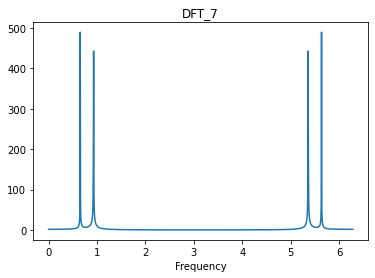

In [3]:
plt.plot(f,np.abs(DFT_7))
plt.xlabel('Frequency')
plt.title('DFT_7')

In [4]:
tones=[d0_n,d1_n,d2_n,d3_n,d4_n,d5_n,d6_n,d7_n,d8_n,d9_n] #Ακολουθία όλων των ψηφίων
sequence=[0,3,1,1,8,8,2,2]

#Ορίζουμε μια συναρτηση η οποία φτιάχνει κάθε φορά τα διανύσματα των τόνων
#Και τοποθετεί ανάλογα πιο ψηφίο είναι στο τονικό σήμα
#Αυτο έγινε για να αποφύγουμε τα μηδενικά και για να μπαίνουν οι σωστές τιμές των τόνων
def make_tone(Sequence):
    tones=np.array([])
    t=np.linspace(0,(1000*len(Sequence))/8192,(1000*len(Sequence)))
    zero_pad=[0]*100
    D1_n=tone_func(0.5346*8192,0.9273*8192,t)
    D2_n=tone_func(0.5346*8192,1.0247*8192,t)
    D3_n=tone_func(0.5346*8192,1.1328*8192,t)
    D4_n=tone_func(0.5906*8192,0.9273*8192,t)
    D5_n=tone_func(0.5906*8192,1.0247*8192,t)
    D6_n=tone_func(0.5906*8192,1.1328*8192,t)
    D7_n=tone_func(0.6535*8192,0.9273*8192,t)
    D8_n=tone_func(0.6535*8192,1.0247*8192,t)
    D9_n=tone_func(0.6535*8192,1.1328*8192,t)
    D0_n=tone_func(0.7217*8192,1.0247*8192,t)
    #Συνάρτηση από την οποία θα παίρνουμε τα τονικ΄ά σήματα
    tones_notes=[D0_n,D1_n,D2_n,D3_n,D4_n,D5_n,D6_n,D7_n,D8_n,D9_n]
    tone_sequence=np.array([])
    check=0 #Check για να λήξει και να μην κάνει το τελευταίο zero_pad οταν φτάσει στο τέλευταιο ψηφίο
    a=0 #Index για να παίρνει κάθε φορά τα σωστά σημεία των τόνων
    for i in range(len(Sequence)):
        tone_sequence=np.append(tone_sequence,[tones_notes[Sequence[i]][a:1000+a]])
        check=check+1
        if(check == len(Sequence)):
            break
        a=a+1000
        tone_sequence=np.append(tone_sequence,[zero_pad])
    return tone_sequence


tone_sequence=make_tone(sequence)
sd.play(tone_sequence,8192)
soundfile.write("tone_sequence.wav",tone_sequence,8192)


Text(0.5, 1.0, 'DFT_2 with Hamming window')

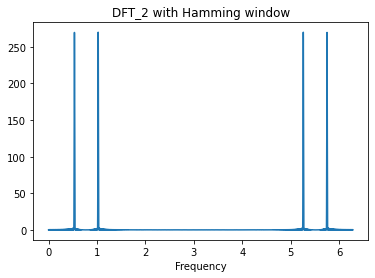

In [5]:
#Ορίζουμε τα παράθυρα με πλήθος ψηφίων για το ΑΜ δηλαδη 8700#
window_rec=np.array([1]*1000)
zero_pad=np.array([0]*7700)
window_rec=np.append(window_rec,zero_pad)
window_ham=np.array([])
for i in range(len(window_rec)):
    window_ham=np.append(window_ham,[window_rec[i]*(0.54-0.46*np.cos(2*np.pi*i/(1000)))])

#Δημιουργούμε δύο λεξικά με keys digit_num_(αριθμός ψηφίου) στο οποία αποθηκεύουμε τους DFT
#για την ανάλυση με κάθε παράθυρο
di_rec={}
di_ham={}

for i in range((len(sequence))):
    DFT_Sequence=tone_sequence*window_rec
    DFT_Sequence=np.fft.fft(DFT_Sequence)
    #Τοποθετούμε σε ένα λεξικό τους DFT για κάθε ψηφίο με το τετραγωνικό παράθυρο
    di_rec["digit_num_{}".format(i+1)]=DFT_Sequence
    #DFT_Tone=np.append(DFT_Tone,DFT_Sequence)
    window_rec=np.roll(window_rec,1100)
    
for i in range((len(sequence))):
    DFT_Sequence=tone_sequence*window_ham
    DFT_Sequence=np.fft.fft(DFT_Sequence)
    di_ham["digit_num_{}".format(i+1)]=DFT_Sequence
    #DFT_Tone=np.append(DFT_Tone,DFT_Sequence)
    window_ham=np.roll(window_ham,1100)


f=np.linspace(0,2*np.pi,8700)
f1=np.linspace(0,2*np.pi,1000)
plt.plot(f,np.abs(di_ham['digit_num_7']))


plt.xlabel('Frequency')
plt.title('DFT_2 with Hamming window')


Text(0.5, 1.0, 'DFT_2 with Rectangular Window')

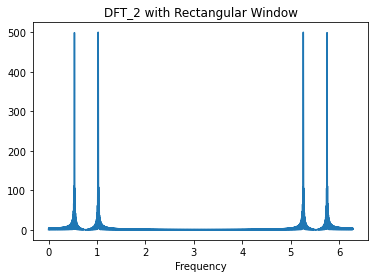

In [6]:
plt.plot(f,np.abs(di_rec['digit_num_7']))
plt.xlabel('Frequency')
plt.title('DFT_2 with Rectangular Window')

In [7]:

window=np.array([1]*1000)
di_ham_total={}
#Δημιουργούμε την λίστα κ που έχει μέσα τις πιο κοντινές συχνότητες για κάθε ψηφίο 
#Βασισμένο στην ανάλυση με το παράθυρο Hamming
for i in range((len(tones))):
    DFT_Sequence=tones[i]*window
    DFT_Sequence=np.fft.fft(DFT_Sequence)
    di_ham_total["string{}".format(i)]=DFT_Sequence
    #DFT_Tone=np.append(DFT_Tone,DFT_Sequence)
    window_rec=np.roll(window_rec,1100)
    
peaks_total={}
for i in range((len(tones))):
    peaks1,properties1=sp.signal.find_peaks((np.abs(di_ham_total['string{}'.format(i)])),250)
    peaks_total["peaks_number_{}".format(i)]=peaks1[0:2]

frequency_total=peaks_total
#Μετρατρέπουμε σε συνεχείς συχνότητες και μετά σε διακριτές
for i in peaks_total:
    frequency_total[i]=frequency_total[i]*int(2*np.pi*(8192/1000))

k=frequency_total
for i in peaks_total:
    k[i]=(frequency_total[i])/8192
print(k)
#To W_Frequency αποτελεί την λίστα κ των συχνοτήτων που πλησιάζουν κοντά στα ψηφία
#Αποτελεί ένα λεξικό που περιέχει το ζευ΄γάρι συχνότητων για κάθε νούμερο


{'peaks_number_0': array([0.71594238, 1.01477051]), 'peaks_number_1': array([0.5291748 , 0.92138672]), 'peaks_number_2': array([0.5291748 , 1.01477051]), 'peaks_number_3': array([0.5291748 , 1.12060547]), 'peaks_number_4': array([0.58520508, 0.92138672]), 'peaks_number_5': array([0.58520508, 1.01477051]), 'peaks_number_6': array([0.58520508, 1.12060547]), 'peaks_number_7': array([0.64746094, 0.92138672]), 'peaks_number_8': array([0.64746094, 1.01477051]), 'peaks_number_9': array([0.64746094, 1.12060547])}


In [8]:
sequence_1=[0,3,1,1,8,8,2,2]
Seq=make_tone(sequence_1)
#sd.play(Seq,8192)

def freq_creator(signal):
    #Δημιοργόυμε ενα τετραγωνικο παραθυρο με μηκος οσο το signal μας
    window_rec=np.array([1]*1000)
    #Ορίζουμε το index που τελειώνει το πρώτο ψηφίο και ξεκινάνε τα μηδενικά
    index=1000
    zero_pad=np.array([0]*(len(signal)-1000))
    window_rec=np.append(window_rec,zero_pad)
    window_temp=window_rec
    di_tones={}
    DFT_Tone=np.array([])
    energy=np.array([])
    CHECK=0
    count=0
    i=0
    while(CHECK!=1):
        CHECK_2=True
        #Οταν το παραθυρο φτάσει στο τε΄λος σημαίνει πως φτάσαμε και στο τελευταίο ψηφίο 
        #οπότε το check λ΄ηγει το recursion στο επόμενο
        if(window_rec[-1]==1):
            CHECK=CHECK+1
        #Υπολογίζουμε τον DFT για το ψηφίο
        DFT_Sequence=signal*window_rec
        DFT_Sequence=np.fft.fft(DFT_Sequence)
        #και το προσ΄θέτουμε στο λεξικό
        di_tones["tone{}".format(i)]=DFT_Sequence
        #Εχουμε ενα counter για να κρατήσουμε το πλήθος των ψηφίων
        count=count+1
        count_roll=0
        #Το δεύτερο while υπολογίζει πόσα μηδενικά υπάρχουν ενδιαμέσου δυο διαδοχικών ψηφίων 
        #και ύστερα ορίζει το index και το πλήθος που πρέπει να μετακινήσουμε το παράθυρο
        while(CHECK_2==True):
            if(index==len(signal)):
                break
            if(signal[index]!=0):
                CHECK_2=False
                break
            count_roll=count_roll+1
            index=index+1
        if(index==len(signal)):
            break
        window_rec=np.roll(window_rec,1000+count_roll)
        index=index+1000
        i=i+1
    peaks_tones={}
    CHECK=0
    i=0
    #Βρίσκουμε τα peaks των DFT και δημιουργούμε ένα λεξικό με τις συχνότητες τους
    for i in range(count):
        peaks,properties=sp.signal.find_peaks((np.abs(di_tones['tone{}'.format(i)])),400)
        peaks_tones["peaks_number_{}".format(i)]=peaks[0:2]
    frequency_tones=peaks_tones
    for i in peaks_tones:
        frequency_tones[i]=frequency_tones[i]*(2*np.pi*(8192/len(signal)))
    W_Frequency=frequency_tones
    for i in peaks_tones:
        W_Frequency[i]=(frequency_tones[i])/8192
    return W_Frequency


def ttdecode(Seq):
    a=freq_creator(Seq)
    #Χρησιμοποι΄ώντας το αποτέλεσμα της βοηθητικής συνάρτησης που ορίσαμε απο πάνω
    #Συγκρίνουμε τις συχνότητες των ψηφίων του σήματος με τις συχνότητες για το κάθε ψηφίο
    #και ύστερα κρατάμε τον αριθμό στον οποίο αντιστοιχεί
    index_ar=np.array([])
    for i in a:
        min_1=a[i][0]
        min_2=a[i][0]
        index_1=0
        index_2=0
        for j in k:
            temp1=abs(k[j][0]-a[i][0])
            temp2=abs(k[j][1]-a[i][1])
            if(temp1<min_1):
                min_1=temp1
                index_1=j
            if(temp2<min_2):
                min_2=temp2
                index_2=j
        for j in k:
            if(k[j][0]==k[index_1][0] and k[j][1]==k[index_2][1]):
                min_place=j
                index_ar=np.append(index_ar,[j[-1]])
    return index_ar
b=ttdecode(Seq)
print(b)
        


    

['0' '3' '1' '1' '8' '8' '2' '2']


In [9]:
sig_1=np.load("easySig.npy")
sig_2=np.load("hardSig.npy")


a=ttdecode(sig_1)
print(a)
b=ttdecode(sig_2)
print(b)


['8' '1' '0' '3' '9' '6' '3' '8']
['4' '8' '1' '9' '2' '1' '5' '3' '6' '3']


Text(0, 0.5, 'Signal Amplitude')

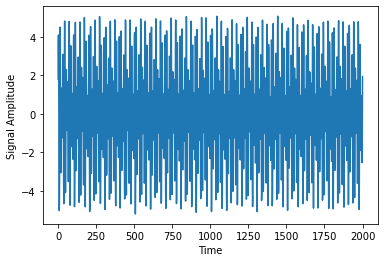

In [10]:
#PART_2#
t=np.linspace(0,2000,2000)
x_n=2*np.cos(2*np.pi*70*t/1000)+3*np.sin(2*np.pi*100*t/1000)+0.1*np.random.normal(size=(2000,))
plt.plot(t,x_n)
plt.xlabel('Time')
plt.ylabel('Signal Amplitude')

(21, 101)


<ipython-input-11-0391a2e28a60>:5: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(t,f,np.log(np.abs(Mag_1)))


Text(0.5, 1.0, 'STFT')

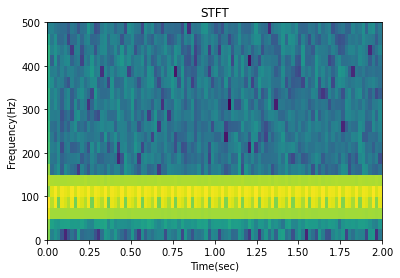

In [11]:
Mag_1=lib.stft(x_n,40,20,40)
print(Mag_1.shape)
t=np.linspace(0,2,101)
f=np.linspace(0,500,21)
plt.pcolormesh(t,f,np.log(np.abs(Mag_1)))
plt.xlabel('Time(sec)')
plt.ylabel('Frequency(Hz)')
plt.title('STFT')

(41, 51)


<ipython-input-12-1fc2ab28f5ff>:5: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(t,f,np.log(np.abs(Mag_2)))


Text(0.5, 1.0, 'STFT_0.08')

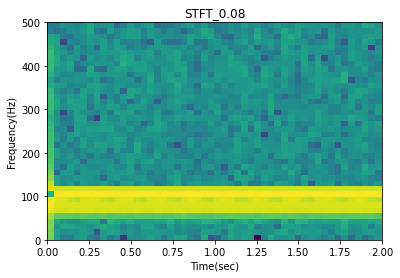

In [12]:
Mag_2=lib.stft(x_n,80,40,80)
print(Mag_2.shape)
t=np.linspace(0,2,51)
f=np.linspace(0,500,41)
plt.pcolormesh(t,f,np.log(np.abs(Mag_2)))
plt.xlabel('Time(sec)')
plt.ylabel('Frequency(Hz)')
plt.title('STFT_0.08')

(81, 26)


<ipython-input-13-f9c3d8c7faa5>:5: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(t,f,np.log(np.abs(Mag_3)))


Text(0.5, 1.0, 'STFT_(0.16s)')

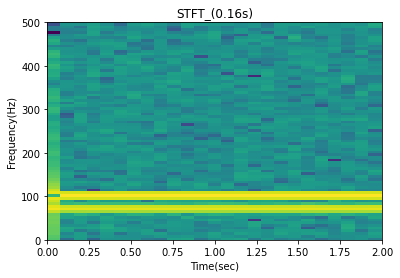

In [13]:
Mag_3=lib.stft(x_n,160,80,160)
print(Mag_3.shape)
t=np.linspace(0,2,26)
f=np.linspace(0,500,81)
plt.pcolormesh(t,f,np.log(np.abs(Mag_3)))
plt.xlabel('Time(sec)')
plt.ylabel('Frequency(Hz)')
plt.title('STFT_(0.16s)')

(80, 2000)


<ipython-input-14-1596a3101e4a>:6: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(t,f,np.log(np.abs(coef)))


Text(0.5, 1.0, 'CWT')

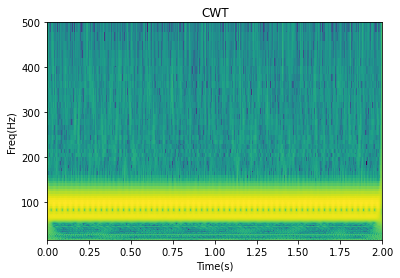

In [14]:
s=np.power(2,np.linspace(1,6,16*5))
coef,freq=pywt.cwt(x_n,s,'cmor3.0-1.0')
print(coef.shape)
t=np.linspace(0,2,2000)
f=freq*1000
plt.pcolormesh(t,f,np.log(np.abs(coef)))
plt.xlabel('Time(s)')
plt.ylabel('Freq(Hz)')
plt.title('CWT')

<ipython-input-15-932058e98423>:4: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(t,s,np.log(np.abs(coef)))


Text(0.5, 1.0, 'CWT')

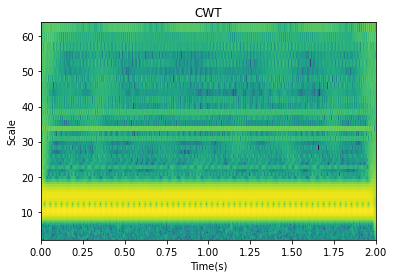

In [15]:
s=np.power(2,np.linspace(1,6,16*5))
coef,freq=pywt.cwt(x_n,s,'cmor3.0-1.0')
t=np.linspace(0,2,2000)
plt.pcolormesh(t,s,np.log(np.abs(coef)))
plt.xlabel('Time(s)')
plt.ylabel('Scale')
plt.title('CWT')

Text(0, 0.5, 'Signal Amplitude')

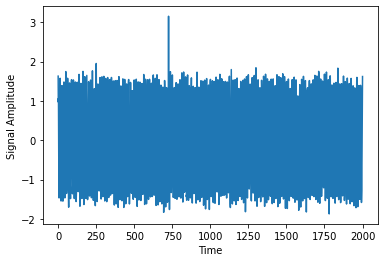

In [16]:
#2.2#
t=np.linspace(0,2000,2000)
x_n=1.5*np.cos(2*np.pi*80*t/1000)+0.15*np.random.normal(size=2000,)
x_n[725]=x_n[725]+1.7
x_n[900]=x_n[900]-1.7
plt.plot(t,x_n)
plt.xlabel("Time")
plt.ylabel("Signal Amplitude")

(21, 101)


Text(0.5, 1.0, 'STFT')

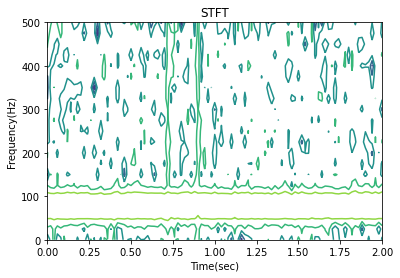

In [17]:
Mag_1=lib.stft(x_n,40,20,40)
print(Mag_1.shape)
t=np.linspace(0,2,101)
f=np.linspace(0,500,21)
plt.contour(t,f,np.log(np.abs(Mag_1)))
plt.xlabel('Time(sec)')
plt.ylabel('Frequency(Hz)')
plt.title('STFT')

(41, 51)


Text(0.5, 1.0, 'STFT_0.08')

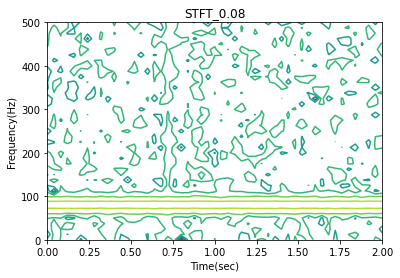

In [18]:
Mag_2=lib.stft(x_n,80,40,80)
print(Mag_2.shape)
t=np.linspace(0,2,51)
f=np.linspace(0,500,41)
plt.contour(t,f,np.log(np.abs(Mag_2)))
plt.xlabel('Time(sec)')
plt.ylabel('Frequency(Hz)')
plt.title('STFT_0.08')

(81, 26)


Text(0.5, 1.0, 'STFT_0.16')

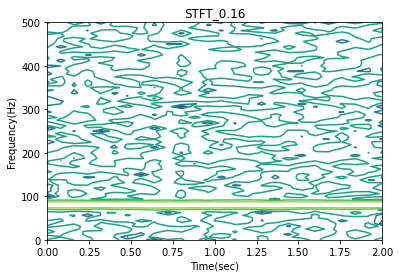

In [19]:
Mag_3=lib.stft(x_n,160,80,160)
print(Mag_3.shape)
t=np.linspace(0,2,26)
f=np.linspace(0,500,81)
plt.contour(t,f,np.log(np.abs(Mag_3)))
plt.xlabel('Time(sec)')
plt.ylabel('Frequency(Hz)')
plt.title('STFT_0.16')

(80, 2000)


<ipython-input-20-3289c3fb03e5>:7: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(t,f,np.log(np.abs(coef)))


Text(0.5, 1.0, 'CWT')

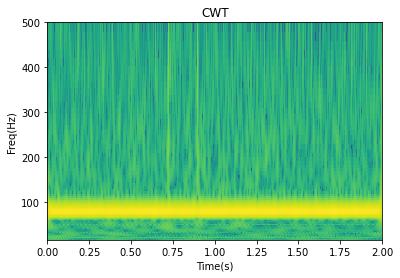

In [20]:
s=np.power(2,np.linspace(1,6,16*5))
coef,freq=pywt.cwt(x_n,s,'cmor3.0-1.0')
print(coef.shape)

t=np.linspace(0,2,2000)
f=freq*1000
plt.pcolormesh(t,f,np.log(np.abs(coef)))
plt.xlabel('Time(s)')
plt.ylabel('Freq(Hz)')
plt.title('CWT')

<ipython-input-21-081887cad592>:4: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(t,s,(np.log(np.abs(coef))))


Text(0.5, 1.0, 'CWT')

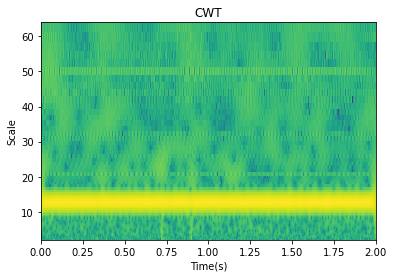

In [21]:
s=np.power(2,np.linspace(1,6,16*5))
coef,freq=pywt.cwt(x_n,s,'cmor3.0-1.0')
t=np.linspace(0,2,2000)
plt.pcolormesh(t,s,(np.log(np.abs(coef))))
plt.xlabel('Time(s)')
plt.ylabel('Scale')
plt.title('CWT')

In [22]:
#PART_3#
sig,sr=soundfile.read("speech_utterance.wav")
#sd.play(sig,sr)

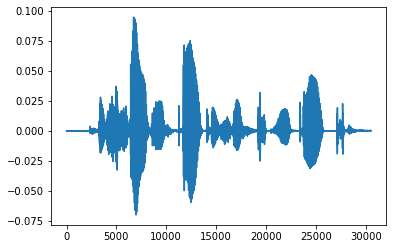

In [26]:
def En_Zcr_calc(sr,win_length,sig):   
    win_ham_1=np.hamming(int(sr*win_length))
    window_rec=np.array([1]*(int(sr*win_length)))
    print(len(window_rec))
    zero_pad=np.array([0]*(len(sig)-(int(sr*win_length))))
    win_rec=np.append(window_rec,zero_pad)
    win_rec=window_rec*(1/(2*(int(sr*win_length))))
    sig_en=(np.abs(sig))**2
    En=np.array([])
    En=np.convolve(sig_en,win_ham_1)
    sig_zcr_1=np.sign(sig)
    sig_zcr_2=np.sign(np.roll(sig,1))
    sig_zcr=np.abs(sig_zcr_1-sig_zcr_2)
    Zn=np.array([])
    Zn=np.convolve(sig_zcr,win_rec)
    return En,Zn
    
plt.plot(sig)

320


Text(0.5, 1.0, 'STE_0.02')

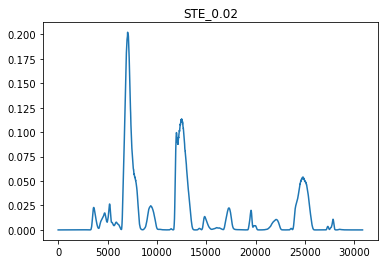

In [27]:
En_1,Zn_1=En_Zcr_calc(sr,0.02,sig)

plt.plot(En_1)
plt.title("STE_0.02")

480


Text(0.5, 1.0, 'STE_0.03')

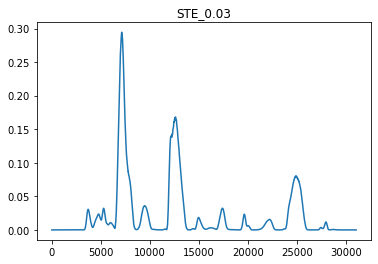

In [28]:
En_2,Zn_2=En_Zcr_calc(sr,0.03,sig)
plt.plot(En_2)
plt.title("STE_0.03")

Text(0.5, 1.0, 'ZCR_0.02')

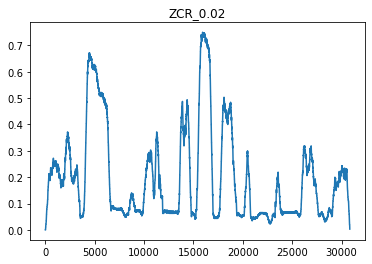

In [29]:
plt.plot(Zn_1)
plt.title("ZCR_0.02")

Text(0.5, 1.0, 'ZCR_0.03')

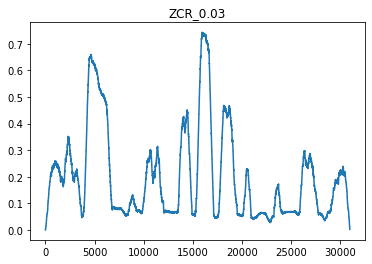

In [30]:
plt.plot(Zn_2)
plt.title("ZCR_0.03")

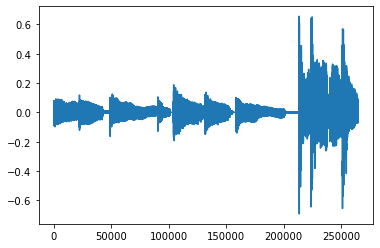

In [8]:
sig,sr=soundfile.read("music.wav")
#sd.play(sig,sr)
plt.plot(sig)


441


Text(0.5, 1.0, 'STE_0.02')

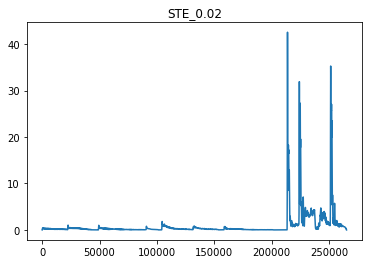

In [32]:
En_1,Zn_1=En_Zcr_calc(sr,0.02,sig)
plt.plot(En_1)
plt.title("STE_0.02")

661


Text(0.5, 1.0, 'STE_0.03')

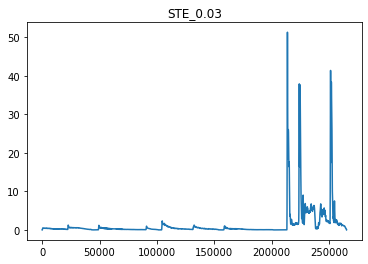

In [33]:
En_2,Zn_2=En_Zcr_calc(sr,0.03,sig)
plt.plot(En_2)
plt.title("STE_0.03")

Text(0.5, 1.0, 'ZCR_0.02')

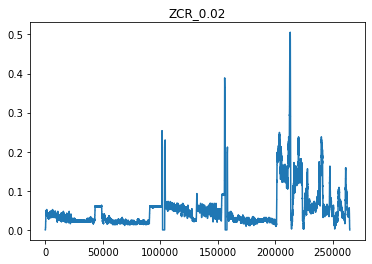

In [45]:
plt.plot(Zn_1)
plt.title("ZCR_0.02")

Text(0.5, 1.0, 'ZCR_0.03')

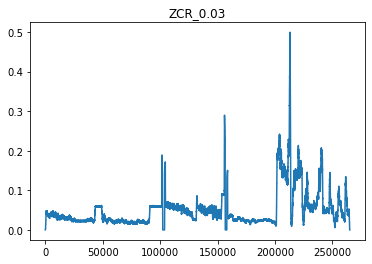

In [34]:
plt.plot(Zn_2)
plt.title("ZCR_0.03")

In [35]:
#PART_4
sig,sr=lib.load("foxtrot_excerpt1.mp3") 

C:\Users\nicks\anaconda3\envs\dsp\lib\site-packages\librosa\core\audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Text(0, 0.5, 'Signal Amplitude')

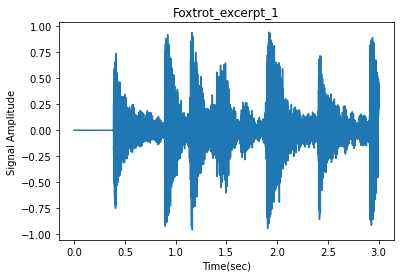

In [36]:
sig_1=sig[0:65536]
#sd.play(sig_1,22050)
t=np.linspace(0,3,65536)
plt.plot(t,sig_1)
plt.title("Foxtrot_excerpt_1")
plt.xlabel("Time(sec)")
plt.ylabel("Signal Amplitude")

In [37]:
(A1,D1)=pywt.dwt(sig_1,"db4")
(A2,D2)=pywt.dwt(A1,"db4")
(A3,D3)=pywt.dwt(A2,"db4")
(A4,D4)=pywt.dwt(A3,"db4")
(A5,D5)=pywt.dwt(A4,"db4")
(A6,D6)=pywt.dwt(A5,"db4")
(A7,D7)=pywt.dwt(A6,"db4")   

In [38]:
def env_curve(sig,level,a):
    abs_sig=np.abs(sig)
    temp=np.array([])
    temp=np.append(temp,(1-a*(2**level))*sig[-1]+a*(2**level)*abs_sig[0])
    for i in range(1,len(sig)):
            temp=np.append(temp,(1-a*(2**level))*temp[i-1]+a*(2**level)*abs_sig[i])
    mean=np.mean(sig)
    temp=temp-mean
    return temp

Text(0.5, 1.0, 'D_2')

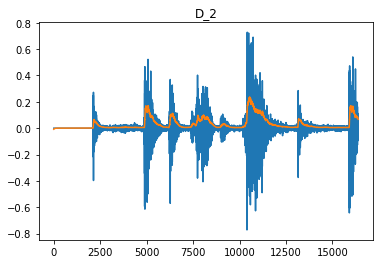

In [39]:
a=env_curve(D2,2,0.005)
plt.plot(D2)
plt.plot(a)
plt.title("D_2")



Text(0.5, 1.0, 'D_4')

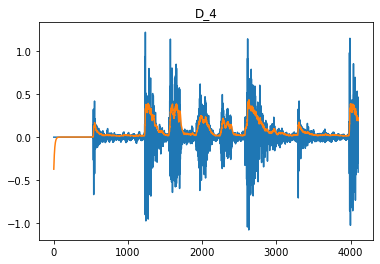

In [40]:
a=env_curve(D4,4,0.005)
plt.plot(D4)
plt.plot(a)
plt.title("D_4")

Text(0.5, 1.0, 'Sum of Enveloping curves')

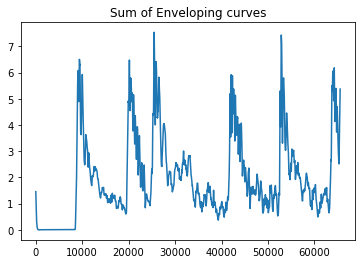

In [41]:
max_length=65536 #Μήκος αρχικού σήματος
a_1=env_curve(D1,1,0.005)
a_2=env_curve(D2,2,0.005)
a_3=env_curve(D3,3,0.005)
a_4=env_curve(D4,4,0.005)
a_5=env_curve(D5,5,0.005)
a_6=env_curve(D6,6,0.005)
a_7=env_curve(D7,7,0.005)
a_8=env_curve(A7,7,0.005)
curve_arr=np.array([a_1,a_2,a_3,a_4,a_5,a_6,a_7,a_8],dtype=object) #Πίνακας με τις περιβάλλουσες
for i in range(len(curve_arr)):#Διαδικασία για το interpolation στο μήκος του αρχικού σήματος
    t_length=np.linspace(0,len(curve_arr[i]),len(curve_arr[i]))
    t_max=np.linspace(0,len(curve_arr[i]),max_length)
    curve_arr[i]=np.interp(t_max,t_length,curve_arr[i])
sum_env=np.array([0]*max_length)
for i in range(len(curve_arr)):
    sum_env=sum_env+curve_arr[i]

plt.plot(sum_env)
plt.title("Sum of Enveloping curves")

65535
120.88815789473684


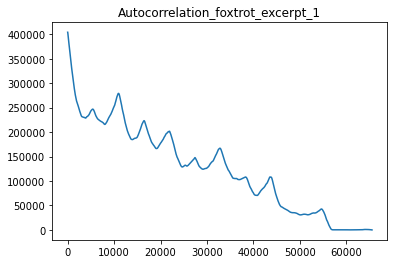

In [42]:
def autocorr(x):#Ορίζουμε μια συνάρτηση που εκτελεί την διαδικασία της αυτοσυσχ΄έτισης και ύστερα παίρνει το μισό κομμάτι
    result = np.correlate(x, x, mode='full')
    print(result.size//2)
    return result[result.size // 2:]

sum_env_c=autocorr(sum_env)

plt.title("Autocorrelation_foxtrot_excerpt_1")
peaks_1=sp.signal.argrelextrema(sum_env_c,np.greater)
plt.plot(sum_env_c)
beat=peaks_1[0]/22050 #Από τα δείγματα βγάζουμε τα δευτερόλεπτα
BPM=60/beat#Και ορίζουμε σε πόσα BPM αντιστοιχεί το κα΄θένα
sig_BPM=0
BPM_Amp=0
for i in range(len(BPM)):
    if(BPM[i]>60 and BPM[i]<200):
        if(sum_env_c[peaks_1[0][i]]>BPM_Amp):
            sig_BPM=BPM[i]
            BPM_Amp=sum_env_c[peaks_1[0][i]]
print(sig_BPM)

In [44]:
sig,sr=lib.load("foxtrot_excerpt2.mp3") 

C:\Users\nicks\anaconda3\envs\dsp\lib\site-packages\librosa\core\audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Text(0, 0.5, 'Signal Amplitude')

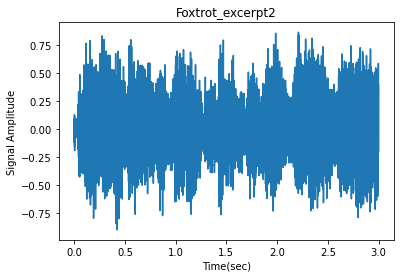

In [45]:
sig_1=sig[88200:153736]
sd.play(sig_1,22050)
t=np.linspace(0,3,65536)
plt.plot(t,sig_1)
plt.title("Foxtrot_excerpt2")
plt.xlabel("Time(sec)")
plt.ylabel("Signal Amplitude")

In [46]:
(A1,D1)=pywt.dwt(sig_1,"db4")
(A2,D2)=pywt.dwt(A1,"db4")
(A3,D3)=pywt.dwt(A2,"db4")
(A4,D4)=pywt.dwt(A3,"db4")
(A5,D5)=pywt.dwt(A4,"db4")
(A6,D6)=pywt.dwt(A5,"db4")
(A7,D7)=pywt.dwt(A6,"db4")

Text(0.5, 1.0, 'D_2')

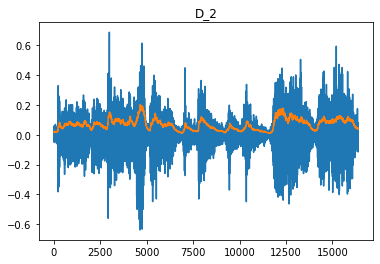

In [47]:
a=env_curve(D2,2,0.005)
plt.plot(D2)
plt.plot(a)
plt.title("D_2")

Text(0.5, 1.0, 'D_4')

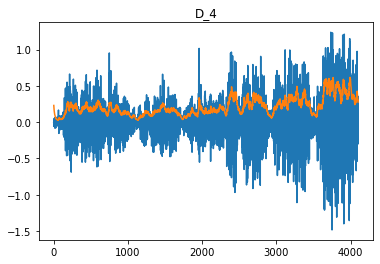

In [48]:
a=env_curve(D4,4,0.005)
plt.plot(D4)
plt.plot(a)
plt.title("D_4")

Text(0.5, 1.0, 'Sum of Enveloping curves')

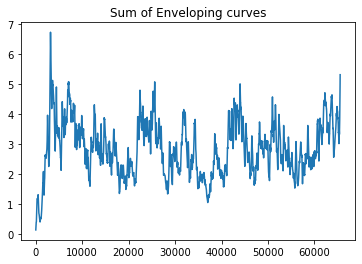

In [49]:
max_length=65536 #Μήκος αρχικού σήματος
a_1=env_curve(D1,1,0.005)
a_2=env_curve(D2,2,0.005)
a_3=env_curve(D3,3,0.005)
a_4=env_curve(D4,4,0.005)
a_5=env_curve(D5,5,0.005)
a_6=env_curve(D6,6,0.005)
a_7=env_curve(D7,7,0.005)
a_8=env_curve(A7,7,0.005)
curve_arr=np.array([a_1,a_2,a_3,a_4,a_5,a_6,a_7,a_8],dtype=object)
for i in range(len(curve_arr)):
    t_length=np.linspace(0,len(curve_arr[i]),len(curve_arr[i]))
    t_max=np.linspace(0,len(curve_arr[i]),max_length)
    curve_arr[i]=np.interp(t_max,t_length,curve_arr[i])
sum_env=np.array([0]*max_length)
for i in range(len(curve_arr)):
    sum_env=sum_env+curve_arr[i]

plt.plot(sum_env)
plt.title("Sum of Enveloping curves")

65535
149.60986090693203


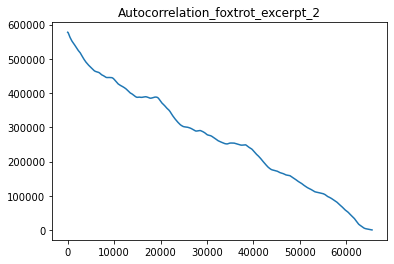

In [50]:
sum_env_c=autocorr(sum_env)

plt.title("Autocorrelation_foxtrot_excerpt_2")
sum_env_c=sp.ndimage.gaussian_filter1d(sum_env_c,165)
peaks_1=sp.signal.argrelextrema(sum_env_c,np.greater)
plt.plot(sum_env_c)
beat=peaks_1[0]/22050
a=np.array([peaks_1[0]])
BPM=60/beat
sig_BPM=0
BPM_Amp=0
for i in range(len(BPM)):
    if(BPM[i]>60 and BPM[i]<200):
        if(sum_env_c[peaks_1[0][i]]>BPM_Amp):
            sig_BPM=BPM[i]
            BPM_Amp=sum_env_c[peaks_1[0][i]]

print(sig_BPM)

In [52]:
sig,sr=lib.load("salsa_excerpt.mp3") 

C:\Users\nicks\anaconda3\envs\dsp\lib\site-packages\librosa\core\audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Text(0, 0.5, 'Signal Amplitude')

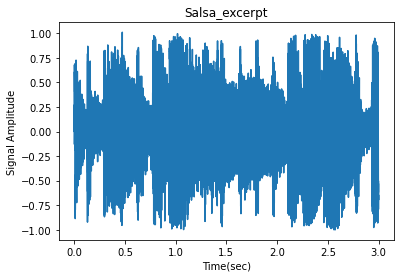

In [53]:
sig_1=sig[22050:87586]
sd.play(sig_1,22050)
t=np.linspace(0,3,65536)
plt.plot(t,sig_1)
plt.title("Salsa_excerpt")
plt.xlabel("Time(sec)")
plt.ylabel("Signal Amplitude")

In [54]:
(A1,D1)=pywt.dwt(sig_1,"db4")
(A2,D2)=pywt.dwt(A1,"db4")
(A3,D3)=pywt.dwt(A2,"db4")
(A4,D4)=pywt.dwt(A3,"db4")
(A5,D5)=pywt.dwt(A4,"db4")
(A6,D6)=pywt.dwt(A5,"db4")
(A7,D7)=pywt.dwt(A6,"db4")

Text(0.5, 1.0, 'D_2')

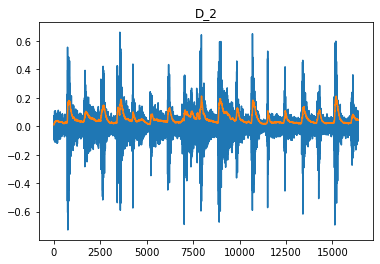

In [55]:
a=env_curve(D2,2,0.005)
plt.plot(D2)
plt.plot(a)
plt.title("D_2")

Text(0.5, 1.0, 'D_4')

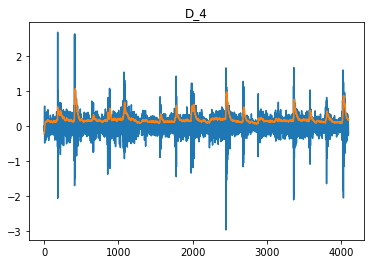

In [56]:
a=env_curve(D4,4,0.005)
plt.plot(D4)
plt.plot(a)
plt.title("D_4")

Text(0.5, 1.0, 'Sum of Enveloping curves')

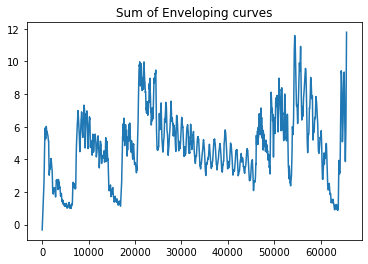

In [57]:
max_length=65536 #Μήκος αρχικού σήματος
a_1=env_curve(D1,1,0.005)
a_2=env_curve(D2,2,0.005)
a_3=env_curve(D3,3,0.005)
a_4=env_curve(D4,4,0.005)
a_5=env_curve(D5,5,0.005)
a_6=env_curve(D6,6,0.005)
a_7=env_curve(D7,7,0.005)
a_8=env_curve(A7,7,0.005)
curve_arr=np.array([a_1,a_2,a_3,a_4,a_5,a_6,a_7,a_8],dtype=object)
for i in range(len(curve_arr)):
    t_length=np.linspace(0,len(curve_arr[i]),len(curve_arr[i]))
    t_max=np.linspace(0,len(curve_arr[i]),max_length)
    curve_arr[i]=np.interp(t_max,t_length,curve_arr[i])
sum_env=np.array([0]*max_length)
for i in range(len(curve_arr)):
    sum_env=sum_env+curve_arr[i]

plt.plot(sum_env)
plt.title("Sum of Enveloping curves")

65535
191.90600522193213


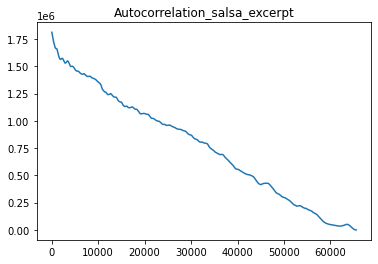

In [58]:
sum_env_c=autocorr(sum_env)

plt.title("Autocorrelation_salsa_excerpt")
peaks_1=sp.signal.argrelextrema(sum_env_c,np.greater)
plt.plot(sum_env_c)
beat=peaks_1[0]/22050
a=np.array([peaks_1[0]])
BPM=60/beat
sig_BPM=0
BPM_Amp=0
for i in range(len(BPM)):
    if(BPM[i]>60 and BPM[i]<200):
        if(sum_env_c[peaks_1[0][i]]>BPM_Amp):
            sig_BPM=BPM[i]
            BPM_Amp=sum_env_c[peaks_1[0][i]]

print(sig_BPM)